# Lab 9 - Network Data Analytics
## 3. Information Diffusion

It is also known as graph activation process, e.g. http://ncase.me/crowds/

Further readings:
+ https://stackoverflow.com/questions/31815454/animate-graph-diffusion-with-networkx
+ https://stackoverflow.com/questions/27475211/animating-a-network-graph-to-show-the-progress-of-an-algorithm/

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\sahit\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



                                              0.0/7.7 MB ? eta -:--:--
                                              0.0/7.7 MB 991.0 kB/s eta 0:00:08
                                              0.2/7.7 MB 2.6 MB/s eta 0:00:03
     -                                        0.4/7.7 MB 3.3 MB/s eta 0:00:03
     ---                                      0.6/7.7 MB 3.3 MB/s eta 0:00:03
     ---                                      0.8/7.7 MB 3.7 MB/s eta 0:00:02
     -----                                    1.0/7.7 MB 3.8 MB/s eta 0:00:02
     ------                                   1.2/7.7 MB 4.1 MB/s eta 0:00:02
     -------                                  1.4/7.7 MB 4.3 MB/s eta 0:00:02
     ---------                                1.7/7.7 MB 4.4 MB/s eta 0:00:02
     ----------                               2.1/7.7 MB 4.7 MB/s eta 0:00:02
     ------------                             2.4/7.7 MB 4.9 MB/s eta 0:00:02
     -------------                            2.6/7.7 MB 5.0 MB/s eta

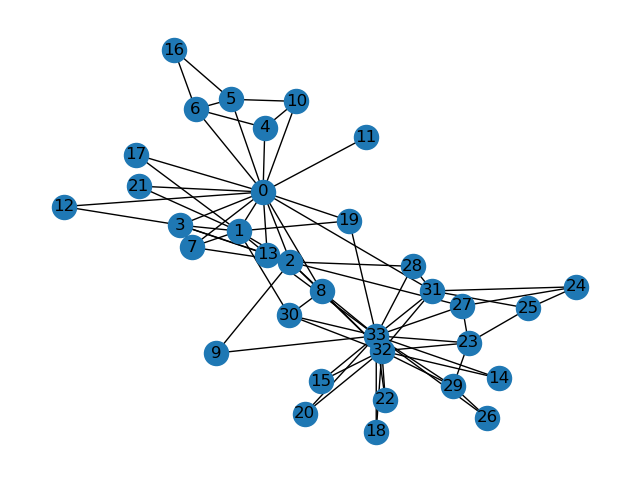

In [3]:
!pip install --upgrade matplotlib networkx
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

# Explicitly create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # You can adjust the size as needed
nx.draw(G, ax=ax, with_labels=True)
plt.show()


### 3.1. Diffusion process
Now we implement the diffusion process. Each active node will cause other nodes in the graph to become active over time. The diffusion rule is that a node gets active if at least a certain percentage of its neighbors become active. The process continues until convergence (i.e. has no new node activated).

OPTIONAL: Can you implement a data visualization to illustrate the diffusion proceess?

In [4]:
def diffusion(graph, seed_set, thr=0.5):
    active = seed_set
    has_changed = False

    # TODO: Loop through not active nodes and activate a node of more than "thr" percent of its neighbors are active
    for n in filter(lambda n: n not in active, graph.nodes()):
        if len(list(filter(lambda neighbor: neighbor in active, graph.neighbors(n)))) >= thr * len(list(graph.neighbors(n))):
            active.add(n)
            has_changed = True

    if has_changed:
        return diffusion(graph, active, thr)  # union of two sets
    return active

diffusion(G, {0, 1})


{0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21}

### 3.2. Influence Maximization

Now we find a minimal set of seeds that maximize the influence (i.e. the number of active nodes). The influence maximization problem is NP-hard in general. Here, we use greedy algorithm which iteratively chooses a seed such that the gain of influence is maximal.

In [5]:
def utility(graph, seeds, thr=0.5):
    return len(diffusion(graph, seeds.copy(), thr))

def greedy(graph, k=3, thr=0.5):
    seeds = set()
    for i in range(k):
        max_gain = 0
        chosen_seed = -1

        # TODO: greedily choose the node as seed with maximal utility gain
        for n in graph.nodes():
            gain = utility(graph, seeds | {n}) - utility(graph, seeds)
            if gain > max_gain:
                max_gain = gain
                chosen_seed = n

        if max_gain > 0:
            seeds |= {chosen_seed}
        else:
            break

    return seeds

seeds = greedy(G, 3)
print(seeds)
print(utility(G, seeds))


{0, 33, 4}
34
